En esta actividad se trabajó con una base de datos compuesta por 83 muestras y 2,308 variables de entrada, correspondientes a la expresión génica estandarizada de distintos genes. La variable de salida, con valores numéricos del 1 al 4, representa distintos tipos de cáncer.

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

Aquí se carga la base de datos en un DataFrame y se visualizan las primeras 10 filas para obtener una vista general de su estructura y contenido.

In [2]:
# Cargar la base de datos
df = pd.read_csv('data_Khan.csv')

# Visualizar la base de datos
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2300,X2301,X2302,X2303,X2304,X2305,X2306,X2307,X2308,y
0,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,...,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172,2
1,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,...,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395,2
2,-0.084469,-1.649739,-0.241308,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,...,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434,2
3,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,...,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483,2
4,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,0.278313,...,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966,2
5,0.458816,-2.875286,0.135841,0.405398,-2.082647,0.137847,1.733530,0.396424,0.045833,0.352064,...,-1.102018,-1.545994,-0.657780,0.390081,-1.660205,-1.651302,-1.130722,-1.129175,0.041142,2
6,0.067098,-1.624044,0.519627,0.238229,-1.397558,0.138805,1.825291,-0.305439,-0.052873,-1.242367,...,0.031596,-1.713133,-0.731680,0.380694,-3.051245,-0.250129,-0.364995,-1.969691,-1.421714,2
7,0.094128,-1.795165,0.702751,0.206038,-1.868209,0.288182,1.406072,0.760338,-0.039053,0.136103,...,0.093126,-2.269150,-0.077853,0.345574,-2.570465,-1.730476,-1.116267,-0.999944,-1.926206,2
8,0.108316,-1.944911,0.600099,-0.051083,-1.981952,0.119204,1.849116,0.237520,-0.050346,-0.252701,...,-0.408119,-2.422495,-0.263835,-0.633747,-3.107782,-1.942815,-0.118558,-2.691193,-2.221005,2
9,-0.970747,-2.347582,-0.392006,-0.141218,-1.823250,-0.303540,1.498551,-0.206409,0.144793,-1.572142,...,-0.226148,-2.302585,0.235862,-0.930897,-2.519498,-2.444149,-0.055618,-0.924071,-1.918003,2


En esta parte se utiliza el método isnull().sum() para comprobar si el conjunto de datos contiene valores faltantes. La función isnull() identifica las celdas vacías y sum() cuenta cuántas hay por columna.

In [3]:
# Comprobar que no hay huecos
print(df.isnull().sum())

X1       0
X2       0
X3       0
X4       0
X5       0
        ..
X2305    0
X2306    0
X2307    0
X2308    0
y        0
Length: 2309, dtype: int64


En esta sección se comparan las clases 2 y 4 del conjunto de datos para identificar los genes más distintivos entre ellas. Primero, se calcula el promedio de expresión génica para cada gen dentro de cada clase por separado. Luego, se obtiene la diferencia entre esos promedios para todos los genes. Finalmente, se seleccionan los 10 genes con mayor diferencia absoluta.

In [4]:
# Calcular promedio de clases 2 y 4 para cada gen
prom2 = df[df['y'] == 2].mean()
prom4 = df[df['y'] == 4].mean()

# Calcular la diferencia de promedios
dif_prom = prom2[:-1] - prom4[:-1]

# Seleccionar los 10 genes con mayor diferencia de promedios
mayor_dif10 = dif_prom.abs().nlargest(10)
print("Top 10 genes con mayor diferencia de promedios entre las clases 2 y 4:\n", mayor_dif10)

Top 10 genes con mayor diferencia de promedios entre las clases 2 y 4:
 X187     3.323151
X509     2.906537
X2046    2.424515
X2050    2.401783
X129     2.165185
X1645    2.065460
X1319    2.045941
X1955    2.037340
X1003    2.011337
X246     1.837830
dtype: float64


Se comparan los genes entre las clases 2 y 4 usando la prueba t de Student para ver cuáles muestran diferencias significativas en su expresión. Como se analizan muchos genes al mismo tiempo, se aplican tres métodos de corrección (Bonferroni, Holm y Benjamini-Hochberg) para evitar falsos positivos. Al final, se muestran cuántos genes resultaron significativos con cada método y cuáles son.

In [5]:
# Separar clases de interés
clase2 = df[df['y'] == 2]
clase4 = df[df['y'] == 4]

# Obtener nombres de genes (todas las columnas excepto la última, que es la clase)
genes = df.columns[:-1]

# Realizar prueba t de Student para cada gen entre clase 2 y clase 4
t_stats = []
p_values = []

for gen in genes:
    t_stat, p_val = ttest_ind(clase2[gen], clase4[gen], equal_var=False)
    t_stats.append(t_stat)
    p_values.append(p_val)

# Crear DataFrame con los resultados
resultados = pd.DataFrame({
    'gen': genes,
    't_stat': t_stats,
    'p_value': p_values
})

# Correcciones por pruebas múltiples
alpha = 0.05

# Bonferroni
bonf_rej, bonf_pvals, _, _ = multipletests(resultados['p_value'], alpha=alpha, method='bonferroni')
# Holm
holm_rej, holm_pvals, _, _ = multipletests(resultados['p_value'], alpha=alpha, method='holm')
# Benjamini-Hochberg (FDR)
bh_rej, bh_pvals, _, _ = multipletests(resultados['p_value'], alpha=alpha, method='fdr_bh')

# Agregar resultados al DataFrame
resultados['bonf_reject'] = bonf_rej
resultados['holm_reject'] = holm_rej
resultados['bh_reject'] = bh_rej
resultados['bonf_pval'] = bonf_pvals
resultados['holm_pval'] = holm_pvals
resultados['bh_pval'] = bh_pvals

# Filtrar genes con diferencias significativas según cada corrección
signif_bonf = resultados[resultados['bonf_reject']]
signif_holm = resultados[resultados['holm_reject']]
signif_bh = resultados[resultados['bh_reject']]

# Mostrar conteos y nombres de genes
print(f"Genes significativos con Bonferroni: {signif_bonf.shape[0]}")
print("Nombres de genes:", signif_bonf['gen'].tolist())
print("\n")

print(f"Genes significativos con Holm: {signif_holm.shape[0]}")
print("Nombres de genes:", signif_holm['gen'].tolist())
print("\n")

print(f"Genes significativos con Benjamini-Hochberg: {signif_bh.shape[0]}")
print("Nombres de genes:", signif_bh['gen'].tolist())
print("\n")

Genes significativos con Bonferroni: 72
Nombres de genes: ['X2', 'X36', 'X67', 'X129', 'X174', 'X187', 'X188', 'X229', 'X246', 'X251', 'X338', 'X348', 'X368', 'X372', 'X373', 'X380', 'X430', 'X433', 'X509', 'X545', 'X554', 'X558', 'X566', 'X603', 'X655', 'X714', 'X762', 'X910', 'X951', 'X971', 'X1003', 'X1021', 'X1023', 'X1055', 'X1070', 'X1093', 'X1105', 'X1110', 'X1112', 'X1132', 'X1194', 'X1196', 'X1207', 'X1217', 'X1298', 'X1319', 'X1327', 'X1330', 'X1372', 'X1389', 'X1416', 'X1610', 'X1626', 'X1634', 'X1645', 'X1706', 'X1708', 'X1723', 'X1738', 'X1799', 'X1888', 'X1896', 'X1911', 'X1924', 'X1954', 'X1955', 'X1980', 'X2046', 'X2050', 'X2115', 'X2146', 'X2247']


Genes significativos con Holm: 72
Nombres de genes: ['X2', 'X36', 'X67', 'X129', 'X174', 'X187', 'X188', 'X229', 'X246', 'X251', 'X338', 'X348', 'X368', 'X372', 'X373', 'X380', 'X430', 'X433', 'X509', 'X545', 'X554', 'X558', 'X566', 'X603', 'X655', 'X714', 'X762', 'X910', 'X951', 'X971', 'X1003', 'X1021', 'X1023', 'X1055', 

En esta parte se aplicó una prueba ANOVA para comparar la expresión de cada gen entre las cuatro clases de cáncer. Luego, se realizaron correcciones por pruebas múltiples (Bonferroni, Holm y Benjamini-Hochberg) para identificar qué genes presentan diferencias estadísticamente significativas.

In [6]:
# Separar las cuatro clases de interés
grupo1 = df[df['y'] == 1]
grupo2 = df[df['y'] == 2]
grupo3 = df[df['y'] == 3]
grupo4 = df[df['y'] == 4]

# Lista de genes (todas las columnas excepto la de clase)
lista_genes = df.columns[:-1]

# Listas para almacenar resultados
valores_f = []
pvalores_anova = []

# ANOVA para cada gen entre las 4 clases
for gen in lista_genes:
    f_val, p_val = f_oneway(grupo1[gen], grupo2[gen], grupo3[gen], grupo4[gen])
    valores_f.append(f_val)
    pvalores_anova.append(p_val)

# Crear DataFrame de resultados de ANOVA
resultados_anova = pd.DataFrame({
    'gen': lista_genes,
    'F_stat': valores_f,
    'p_valor': pvalores_anova
})

# Correcciones por pruebas múltiples
alpha_anova = 0.05

rej_bonf, pval_bonf, _, _ = multipletests(resultados_anova['p_valor'], alpha=alpha_anova, method='bonferroni')
rej_holm, pval_holm, _, _ = multipletests(resultados_anova['p_valor'], alpha=alpha_anova, method='holm')
rej_bh, pval_bh, _, _ = multipletests(resultados_anova['p_valor'], alpha=alpha_anova, method='fdr_bh')

# Añadir resultados al DataFrame
resultados_anova['pval_bonferroni'] = pval_bonf
resultados_anova['pval_holm'] = pval_holm
resultados_anova['pval_bh'] = pval_bh
resultados_anova['significativo_bonf'] = rej_bonf
resultados_anova['significativo_holm'] = rej_holm
resultados_anova['significativo_bh'] = rej_bh

# Filtrar genes significativos
genes_sig_bonf = resultados_anova[resultados_anova['significativo_bonf']]['gen']
genes_sig_holm = resultados_anova[resultados_anova['significativo_holm']]['gen']
genes_sig_bh = resultados_anova[resultados_anova['significativo_bh']]['gen']

# Mostrar resultados
print(f"Genes con diferencias significativas según Bonferroni (ANOVA): {genes_sig_bonf.shape[0]}")
print("Nombres de genes:", genes_sig_bonf.tolist())
print("\n")

print(f"Genes con diferencias significativas según Holm (ANOVA): {genes_sig_holm.shape[0]}")
print("Nombres de genes:", genes_sig_holm.tolist())
print("\n")

print(f"Genes con diferencias significativas según Benjamini-Hochberg (ANOVA): {genes_sig_bh.shape[0]}")
print("Nombres de genes:", genes_sig_bh.tolist())
print("\n")

Genes con diferencias significativas según Bonferroni (ANOVA): 404
Nombres de genes: ['X1', 'X2', 'X3', 'X17', 'X29', 'X33', 'X36', 'X50', 'X52', 'X54', 'X67', 'X74', 'X77', 'X84', 'X85', 'X94', 'X99', 'X107', 'X108', 'X119', 'X123', 'X127', 'X129', 'X139', 'X141', 'X142', 'X146', 'X151', 'X153', 'X165', 'X166', 'X169', 'X171', 'X174', 'X182', 'X187', 'X188', 'X192', 'X217', 'X229', 'X230', 'X235', 'X236', 'X239', 'X244', 'X246', 'X247', 'X248', 'X251', 'X255', 'X256', 'X257', 'X258', 'X262', 'X266', 'X277', 'X279', 'X281', 'X325', 'X326', 'X335', 'X336', 'X338', 'X348', 'X365', 'X368', 'X372', 'X373', 'X378', 'X380', 'X390', 'X397', 'X400', 'X409', 'X417', 'X430', 'X433', 'X437', 'X442', 'X445', 'X449', 'X477', 'X481', 'X490', 'X493', 'X500', 'X504', 'X509', 'X511', 'X521', 'X532', 'X533', 'X543', 'X544', 'X545', 'X546', 'X554', 'X558', 'X566', 'X567', 'X575', 'X585', 'X586', 'X589', 'X590', 'X603', 'X604', 'X607', 'X612', 'X632', 'X635', 'X638', 'X650', 'X666', 'X667', 'X671', 'X672'

Se seleccionan los genes significativos según Bonferroni y se separan los datos en características (X) y etiquetas (y). Luego, las etiquetas se binarizan para la clasificación multiclase y los datos se dividen en conjuntos de entrenamiento y prueba. Se construyen y entrenan tres modelos de Support Vector Machine (SVM) con diferentes kernels: lineal, polinomial de grado 3 y radial (RBF). Se calculan y muestran las métricas de desempeño (exactitud, precisión, recall, F1) y las matrices de confusión para evaluar el rendimiento de cada modelo en el conjunto de prueba.


Desempeño del modelo SVM Lineal:
Exactitud: 1.0
Precisión: 1.0
Sensibilidad (Recall): 1.0
F1 Score: 1.0

Matriz de confusión del modelo SVM Lineal:


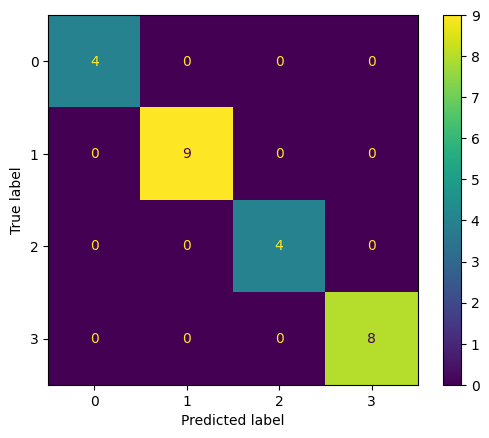


Desempeño del modelo SVM Polinomial:
Exactitud: 0.96
Precisión: 0.968
Sensibilidad (Recall): 0.96
F1 Score: 0.9593650793650794

Matriz de confusión del modelo SVM Polinomial:


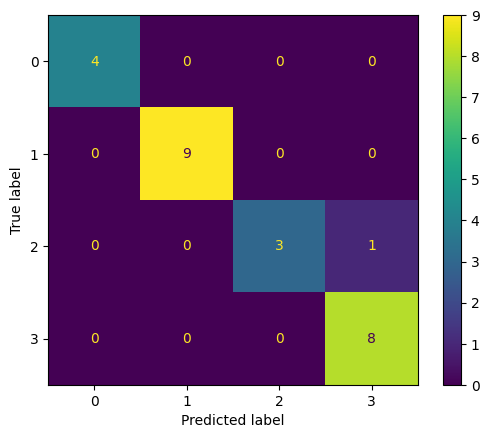


Desempeño del modelo SVM RBF:
Exactitud: 1.0
Precisión: 1.0
Sensibilidad (Recall): 1.0
F1 Score: 1.0

Matriz de confusión del modelo SVM RBF:


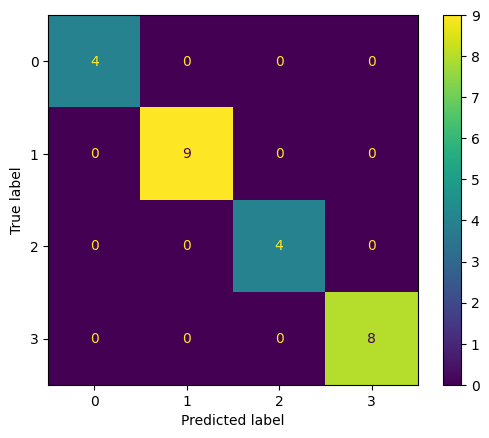

In [7]:
# Seleccionar los genes significativos según Bonferroni (me gustó el nombre jaja, por eso escogí estos)
genes_significativos = [
    'X2', 'X36', 'X67', 'X129', 'X174', 'X187', 'X188', 'X229',
    'X246', 'X251', 'X338', 'X348', 'X368', 'X372', 'X373', 'X380',
    'X430', 'X433', 'X509', 'X545', 'X554', 'X558', 'X566', 'X603',
    'X655', 'X714', 'X762', 'X910', 'X951', 'X971', 'X1003', 'X1021',
    'X1023', 'X1055', 'X1070', 'X1093', 'X1105', 'X1110', 'X1112',
    'X1132', 'X1194', 'X1196', 'X1207', 'X1217', 'X1298', 'X1319',
    'X1327', 'X1330', 'X1372', 'X1389', 'X1416', 'X1610', 'X1626',
    'X1634', 'X1645', 'X1706', 'X1708', 'X1723', 'X1738', 'X1799',
    'X1888', 'X1896', 'X1911', 'X1924', 'X1954', 'X1955', 'X1980',
    'X2046', 'X2050', 'X2115', 'X2146', 'X2247'
]

# Separar características (X) y etiquetas (y)
X = df[genes_significativos]
y = df['y']

# Binarizar las etiquetas para la clasificación multiclase
y_binarizado = label_binarize(y, classes=[1, 2, 3, 4])
num_clases = y_binarizado.shape[1]

# Dividir los datos en conjuntos de entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y_binarizado, test_size=0.3, random_state=42)

# 1. SVM con kernel lineal
svm_lineal = OneVsRestClassifier(SVC(kernel='linear', probability=True))
svm_lineal.fit(X_train, y_train)
y_score_linear = svm_lineal.decision_function(X_test)
y_pred_linear = svm_lineal.predict(X_test)

# 2. SVM con kernel polinomial de grado 3
svm_polynomial = OneVsRestClassifier(SVC(kernel='poly', degree=3, probability=True))
svm_polynomial.fit(X_train, y_train)
y_score_poly = svm_polynomial.decision_function(X_test)
y_pred_poly = svm_polynomial.predict(X_test)

# 3. SVM con kernel radial (RBF)
svm_rbf = OneVsRestClassifier(SVC(kernel='rbf', probability=True))
svm_rbf.fit(X_train, y_train)
y_score_rbf = svm_rbf.decision_function(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Función para calcular e imprimir métricas
def print_metrics(y_true, y_pred, model_name):
    print(f"\nDesempeño del modelo {model_name}:")
    print("Exactitud:", accuracy_score(y_true.argmax(axis=1), y_pred.argmax(axis=1)))
    print("Precisión:", precision_score(y_true.argmax(axis=1), y_pred.argmax(axis=1), average='weighted'))
    print("Sensibilidad (Recall):", recall_score(y_true.argmax(axis=1), y_pred.argmax(axis=1), average='weighted'))
    print("F1 Score:", f1_score(y_true.argmax(axis=1), y_pred.argmax(axis=1), average='weighted'))

# Matriz de confusión
def plot_roc_curve(y_true, y_score, model_name):
    print(f"\nMatriz de confusión del modelo {model_name}:")
    cm = confusion_matrix(y_true.argmax(axis=1), y_score.argmax(axis=1))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_lineal.classes_)
    disp.plot()
    plt.show()

# Imprimir métricas
print_metrics(y_test, svm_lineal.predict(X_test), "SVM Lineal")
plot_roc_curve(y_test, y_score_linear, "SVM Lineal")
print_metrics(y_test, svm_polynomial.predict(X_test), "SVM Polinomial")
plot_roc_curve(y_test, y_score_poly, "SVM Polinomial")
print_metrics(y_test, svm_rbf.predict(X_test), "SVM RBF")
plot_roc_curve(y_test, y_score_rbf, "SVM RBF")

En este análisis, los modelos SVM con kernel lineal y RBF demostraron ser los más efectivos para hacer predicciones (las métricas son perfectas... wow). Es importante comprobar estos resultados usando un conjunto de datos más amplio o aplicando validación cruzada, para evitar que el modelo esté sobreajustado y solo funcione bien con los datos de entrenamiento.